# Robot Data Analysis

In [25]:
from converter import convert_txt_to_csv

convert_txt_to_csv("data", "data", 20000)

In [26]:
import pandas as pd

file_path = 'data.csv'
df = pd.read_csv(file_path, names=['z_V', 'y_V', 'x_V'])

# Dodanie kolumny 't' reprezentującej kolejne wiersze
# df['t_0.002s'] = df.index
df['t_s'] = df.index * 0.002 # 500 Hz = 0.002s

# Przeliczenie wartości z czujników na milimetry
df['z_mm'] = df['z_V'] / 0.1  # 1V/cm = 0.1V/mm
df['y_mm'] = df['y_V'] / 0.143  # 1.43V/cm = 0.143V/mm
df['x_mm'] = df['x_V'] / 0.143  # 1.43V/cm = 0.143V/mm

display(df)

,z_V,y_V,x_V,t_s,z_mm,y_mm,x_mm
0,-1.9556,3.3356,6.8568,0.000,-19.556,23.325874,47.949650
1,-1.9544,3.3368,6.8560,0.002,-19.544,23.334266,47.944056
2,-1.9572,3.3376,6.8568,0.004,-19.572,23.339860,47.949650
3,-1.9520,3.3364,6.8580,0.006,-19.520,23.331469,47.958042
4,-1.9572,3.3348,6.8580,0.008,-19.572,23.320280,47.958042
...,...,...,...,...,...,...,...
19995,0.5896,0.3548,0.3732,39.990,5.896,2.481119,2.609790
19996,0.5896,0.3540,0.3692,39.992,5.896,2.475524,2.581818
19997,0.5880,0.3520,0.3712,39.994,5.880,2.461538,2.595804
19998,0.5888,0.3540,0.3720,39.996,5.888,2.475524,2.601399


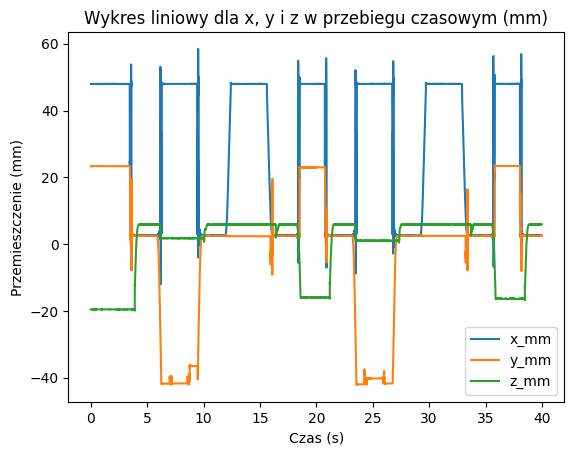

In [27]:
# Tworzenie wykresu liniowego dla przebiegów x, y i z w milimetrach
import matplotlib.pyplot as plt

plt.plot(df['t_s'], df['x_mm'], label='x_mm')
plt.plot(df['t_s'], df['y_mm'], label='y_mm')
plt.plot(df['t_s'], df['z_mm'], label='z_mm')

# Ustawienie etykiet osi i tytułu
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [mm]')
plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym')

# Dodanie legendy
plt.legend()

# Zapisanie wykresu jako SVG
plt.savefig('wykres_mm.svg', format='svg')

# Wyświetlenie wykresu
plt.show()

In [28]:
import numpy as np

# Funkcja do obliczenia powtarzalności pozycjonowania (odchylenie standardowe)
def calculate_repeatability(data):
    return np.std(data)

# Analiza powtarzalności dla całego zbioru
rp_all_x = calculate_repeatability(df['x_mm'])
rp_all_y = calculate_repeatability(df['y_mm'])
rp_all_z = calculate_repeatability(df['z_mm'])

# Analiza powtarzalności dla pierwszych 50 powtórzeń
rp_first_50_x = calculate_repeatability(df['x_mm'][:50])
rp_first_50_y = calculate_repeatability(df['y_mm'][:50])
rp_first_50_z = calculate_repeatability(df['z_mm'][:50])

# Analiza powtarzalności dla ostatnich 50 powtórzeń
rp_last_50_x = calculate_repeatability(df['x_mm'][-50:])
rp_last_50_y = calculate_repeatability(df['y_mm'][-50:])
rp_last_50_z = calculate_repeatability(df['z_mm'][-50:])

# Analiza powtarzalności dla powtórzeń od 26 do 75
rp_middle_x = calculate_repeatability(df['x_mm'][25:75])
rp_middle_y = calculate_repeatability(df['y_mm'][25:75])
rp_middle_z = calculate_repeatability(df['z_mm'][25:75])

# Wyniki
results = {
    'RP All (100)': {'x': rp_all_x, 'y': rp_all_y, 'z': rp_all_z},
    'RP First 50': {'x': rp_first_50_x, 'y': rp_first_50_y, 'z': rp_first_50_z},
    'RP Last 50': {'x': rp_last_50_x, 'y': rp_last_50_y, 'z': rp_last_50_z},
    'RP Middle (26-75)': {'x': rp_middle_x, 'y': rp_middle_y, 'z': rp_middle_z}
}

# Wyświetlenie wyników
for key, value in results.items():
    print(f"{key}: x={value['x']:.4f} mm, y={value['y']:.4f} mm, z={value['z']:.4f} mm")


RP All (100): x=22.1423 mm, y=19.8095 mm, z=9.5361 mm
RP First 50: x=0.0135 mm, y=0.0080 mm, z=0.0143 mm
RP Last 50: x=0.0134 mm, y=0.0084 mm, z=0.0151 mm
RP Middle (26-75): x=0.0106 mm, y=0.0072 mm, z=0.0125 mm
